# Import modules

In [1]:
import pandas as pd

# our modules
import sys
sys.path.insert(0, '..')

# user defined
from clean import clean_data
from imbalance import balance_data
from evaluate import evaluate_model

# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

# pipeline
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, roc_auc_score, r2_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix

from lazypredict.Supervised import LazyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.precision", 6)
pd.set_option("display.float_format", lambda x: "%.6f" % x)

In [3]:
RANDOM_STATE = 123

# Load data

In [4]:
data = pd.read_csv('/home/hristo/Documents/WBS_Data_Science/WBS_Predictive_Maintenance/data/ai4i2020.csv', index_col='UDI')

In [5]:
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.100000,308.600000,1551,42.800000,0,0,0,0,0,0,0
2,L47181,L,298.200000,308.700000,1408,46.300000,3,0,0,0,0,0,0
3,L47182,L,298.100000,308.500000,1498,49.400000,5,0,0,0,0,0,0
4,L47183,L,298.200000,308.600000,1433,39.500000,7,0,0,0,0,0,0
5,L47184,L,298.200000,308.700000,1408,40.000000,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.800000,308.400000,1604,29.500000,14,0,0,0,0,0,0
9997,H39410,H,298.900000,308.400000,1632,31.800000,17,0,0,0,0,0,0
9998,M24857,M,299.000000,308.600000,1645,33.400000,22,0,0,0,0,0,0


# Clean data

In [6]:
data_cl = clean_data(data, drop_type=True)
data_cl

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
UDI,,,,,,
1,298.100000,308.600000,1551,42.800000,0,0
2,298.200000,308.700000,1408,46.300000,3,0
3,298.100000,308.500000,1498,49.400000,5,0
4,298.200000,308.600000,1433,39.500000,7,0
5,298.200000,308.700000,1408,40.000000,9,0
...,...,...,...,...,...,...
9996,298.800000,308.400000,1604,29.500000,14,0
9997,298.900000,308.400000,1632,31.800000,17,0
9998,299.000000,308.600000,1645,33.400000,22,0


# Prepare data

In [7]:
X = data_cl.copy()
y = X.pop('Machine failure')

# Split train and test

In [8]:
balance = True
if balance:
    data_bal, method = balance_data(X, y, random_state=RANDOM_STATE, method='ROS')
    X_bl, y_bl = data_bal

    # print(X_bl.info())
    # print(y_bl.info())

    # y_bl.value_counts().plot(kind='bar')

    X_train, X_test, y_train, y_test = train_test_split(X_bl, y_bl, train_size=0.8, random_state=RANDOM_STATE)
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_STATE)

In [35]:
y_imb = y.value_counts()
y_imb

0    9661
1     339
Name: Machine failure, dtype: int64

[Text(0, 0, '9661'), Text(0, 0, '339')]

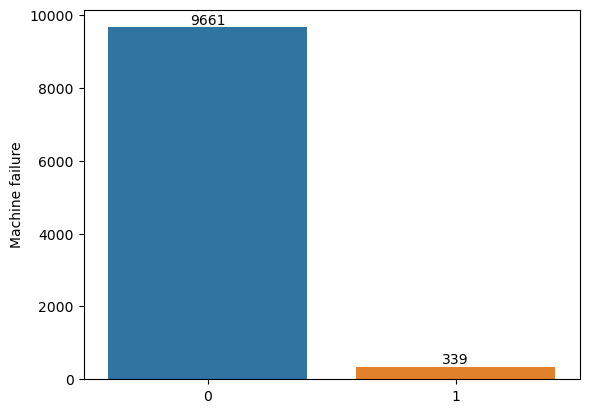

In [40]:
ax = sns.barplot(
    y=y_imb,
    x=y_imb.index
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '9661'), Text(0, 0, '9661')]

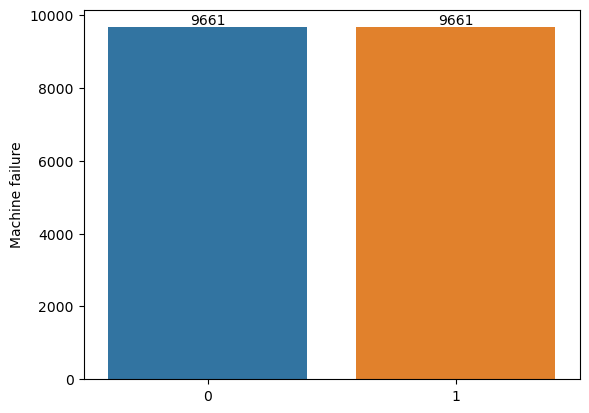

In [43]:
y_b = y_bl.value_counts()
ax = sns.barplot(
    y=y_b,
    x=y_b.index
)

ax.bar_label(ax.containers[0])

# Baseline model

## Pipeline

In [9]:
# params = {}

In [10]:
# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     # ('estimator', DecisionTreeClassifier(random_state=RANDOM_STATE))
#     ('estimator', ExtraTreesClassifier())
# ])

In [11]:
# pipe.fit(X_train, y_train)

In [12]:
# y_pred = pipe.predict(X_test)

In [13]:
# grid = GridSearchCV(
#     pipe,
#     param_grid=params,
#     scoring='accuracy',
#     cv=5,
#     verbose=1
# )

In [14]:
# grid.fit(X_train, y_train)

In [15]:
# best_score = grid.best_score_
# print(best_score)

In [16]:
# best = grid.best_estimator_

In [17]:
# y_pred = best.predict(X_test)

## Evaluation

In [18]:
# accuracy, recall, precision, f1s, roc = evaluate_model(y_test, y_predictions=y_pred)

In [19]:
# print(f"Accuracy: {accuracy:.2%}")
# print(f"Recall: {recall:.2%}")
# print(f"Precision: {precision:.2%}")
# print(f"F1-Score: {f1s:.2%}")
# print(f"ROC AUC score: {roc:.2%}")

In [20]:
# conf_matrix = confusion_matrix(y_test, y_pred)
# sns.heatmap(data=conf_matrix, annot=True)

In [21]:
# conf_matrix

# Grid search

In [22]:
params_pre = {
    "scaler__with_mean": [True, False],
    "scaler__with_std": [True, False]
}

In [23]:
estimators = {
    # 'DT': [DecisionTreeClassifier(random_state=RANDOM_STATE), {
    #     'estimator__max_depth': [None, 3, 6],
    #     'estimator__criterion': ['gini', 'entropy', 'log_loss']
    # }],
    # 'RF': [RandomForestClassifier(random_state=RANDOM_STATE), {
    #     'estimator__n_estimators': range(50, 200, 50)
    # }],
    # 'BC': [BaggingClassifier(SVC(), random_state=RANDOM_STATE), {
    #     'estimator__n_estimators': range(5, 16, 5)
    # }],
    'ET': [ExtraTreesClassifier(random_state=RANDOM_STATE), {
        'estimator__n_estimators': range(50, 200, 50),
        'estimator__criterion': ['gini', 'entropy', 'log_loss'],
        'estimator__max_depth': [None, 3, 6]
    }],
    # 'XG': [XGBClassifier(), {
    #     'estimator__n_estimators': range(50, 200, 50),
    #     'estimator__max_depth': [None, 3, 6],
    #     'estimator__learning_rate': [0.01, 0.05, 0.1]
    # }]

}

In [24]:
def create_pipeline_and_cvparams(estimator):

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('estimator', estimator[1][0])
    ])

    cvparams = estimator[1][1]

    return pipe, cvparams

In [25]:
def run_model(xtrain, ytrain, xtest, ytest, params_pre, estimator, cv):

    pipe, params_est = create_pipeline_and_cvparams(estimator=estimator)

    if params_est:
        params = params_pre | params_est
    else:
        params = params_pre

    grid = GridSearchCV(pipe, params, cv=cv, verbose=1)
    grid.fit(xtrain, ytrain)

    grid_score       = grid.best_score_
    grid_best_params = grid.best_params_
    best_estimator   = grid.best_estimator_

    return best_estimator, grid_best_params, grid_score

In [26]:
total = {}
for estimator in estimators.items():
    model, best_params, score = run_model(
        xtrain=X_train,
        ytrain=y_train,
        xtest=X_test,
        ytest=y_test,
        params_pre=params_pre,
        estimator=estimator,
        cv=5
    )

    total[estimator[0]] = {
        'model': model,
        'best_params': best_params,
        'grid_score': score,
    }

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [27]:
def get_scores(results, estimator, X_train, y_train, X_test, y_test):
    cur = total[estimator]['model']
    cur.fit(X_train, y_train)

    y_pred = cur.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

In [28]:
for key in total.keys():
    get_scores(total, key, X_train, y_train, X_test, y_test)

0.9992238033635188


# Save best model

In [29]:
import joblib

In [31]:
joblib.dump(total['ET']['model'], 'ML_balanced_single.joblib')

['ML_balanced_single.joblib']

# Lazy Osveh method

In [ ]:
# from lazypredict.Supervised import LazyClassifier

In [ ]:
# clf = LazyClassifier(random_state=RANDOM_STATE, predictions=True)

In [ ]:
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
# models.apply(lambda x: 100*x, axis=1)

In [ ]:
# model_dict = clf.provide_models(X_train, X_test, y_train, y_test)

In [ ]:
# model_dict['ExtraTreesClassifier']

In [ ]:
# ax= plt.subplot()
# conf_matrix = confusion_matrix(y_test, y_pred)
# s = sns.heatmap(data=conf_matrix, annot=True, ax=ax)
# #s.set(xlabel='X-Axis', ylabel='Y-Axis')
# ax.xaxis.set_ticklabels(['Without Failure', 'Failure'])
# ax.yaxis.set_ticklabels(['Without Failure', 'Failure'])